<h1>Импорт библиотек

In [120]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [121]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])

    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)

    return result


def test(X, V, expected):
    res = sum_prod(X, V)
    assert np.array_equal(res, expected)


matrices = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]]), np.array([[9, 10], [11, 12]])]
vectors = [np.array([[1], [2]]), np.array([[3], [4]]), np.array([[5], [6]])]

expected_result = np.array([[149], [191]])

test(matrices, vectors, expected_result)

matrices_1 = [np.array([[1, 3, 7], [2, 2, 1], [5, 2, 1]]), np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])]
vectors_1 = [np.array([[3], [1], [3]]), np.array([[4], [2], [5]])]

expected_result_1 = np.array([[50], [67], [109]])

test(matrices_1, vectors_1, expected_result_1)

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [122]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)


def test(input_data, expected):
    res = binarize(input_data)
    np.array_equal(res, expected)


matrix_1 = np.array([[0.2, 0.8, 0.5],
                     [0.6, 0.3, 0.9],
                     [0.4, 0.7, 0.1]])

expected_matrix_1 = np.array([[0, 1, 0],
                              [1, 0, 1],
                              [0, 1, 0]])

test(matrix_1, expected_matrix_1)

matrix_2 = np.array([[0.1, -0.2],
                     [0.8, 1.2]])

expected_matrix_2 = np.array([[0, 0],
                              [1, 1]])

test(matrix_2, expected_matrix_2)

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [123]:
def unique_rows(mat) -> list[np.array]:
    return [np.unique(row) for row in mat]


def unique_columns(mat) -> list[np.array]:
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]


def test_unique_row(input_data, expected_row):
    res_row = unique_rows(input_data)
    for i in range(len(res_row)):
        assert np.array_equal(res_row[i], expected_row[i])


def test_unique_column(input_data, expected_column):
    res_column = unique_columns(input_data)
    for i in range(len(res_column)):
        assert np.array_equal(res_column[i], expected_column[i])


matrix_1 = np.array([[1, 2, 3, 4],
                     [1, 4, 4, 6],
                     [7, 2, 7, 7]])

exp_row_1 = [np.array([1, 2, 3, 4]),
             np.array([1, 4, 6]),
             np.array([2, 7])]

exp_column_1 = [np.array([1, 7]),
                np.array([2, 4]),
                np.array([3, 4, 7]),
                np.array([4, 6, 7])]

matrix_2 = np.array([[1, 1, 3],
                     [2, 4, 2],
                     [6, 5, 5]])

exp_row_2 = [np.array([1, 3]),
             np.array([2, 4]),
             np.array([5, 6])]

exp_column_2 = [np.array([1, 2, 6]),
                np.array([1, 4, 5]),
                np.array([2, 3, 5])]

test_unique_row(matrix_1, exp_row_1)
test_unique_column(matrix_1, exp_column_1)
test_unique_row(matrix_2, exp_row_2)
test_unique_column(matrix_2, exp_column_2)

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Matrix: 
[[-0.21198849 -2.10272693  0.97846942  0.75460055]
 [-0.01944685  1.37760142 -1.22577613  0.66607132]
 [ 1.62173298 -1.18292776 -1.22681443  1.41936593]
 [-1.4685342   0.35690943  0.48852199 -0.30233222]
 [-0.17944658  0.77650163 -0.2389008   1.04776605]]


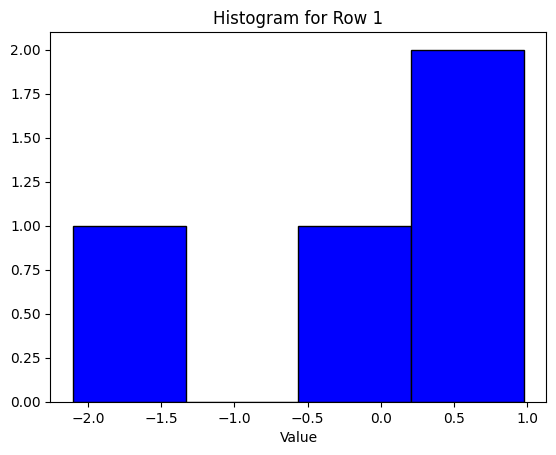

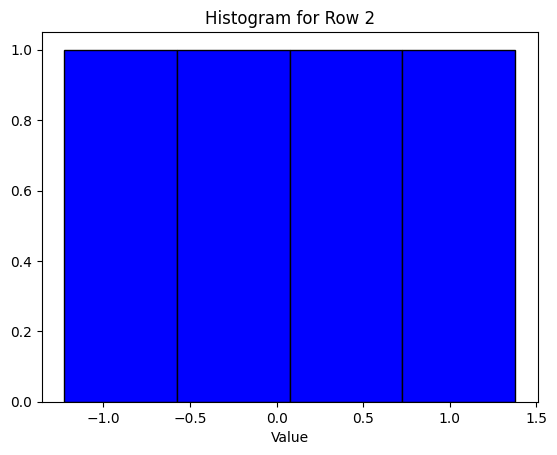

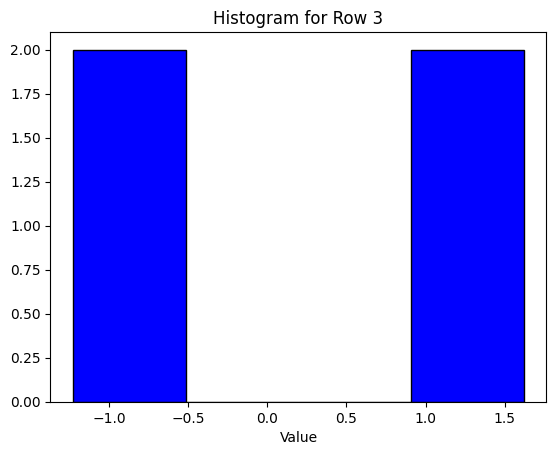

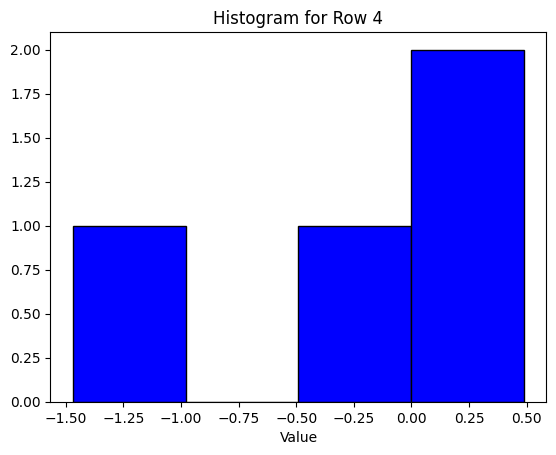

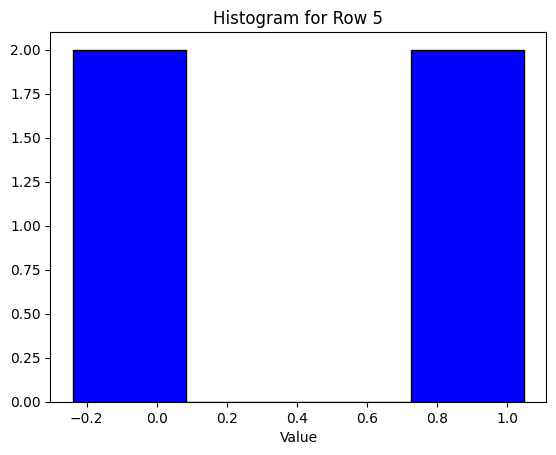

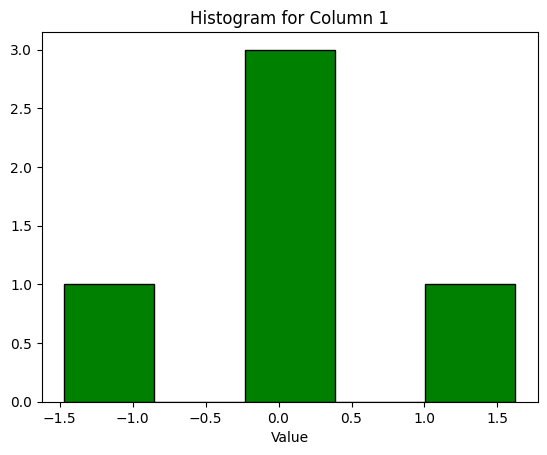

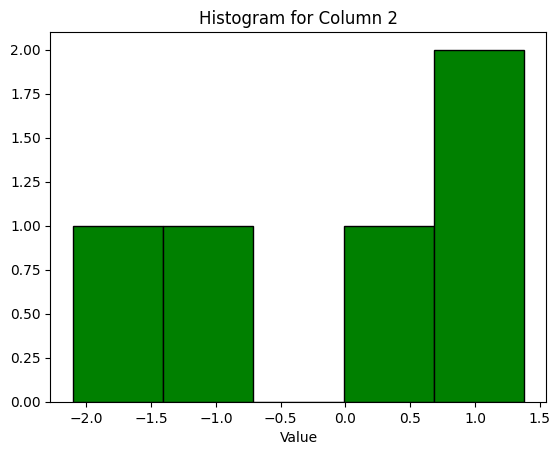

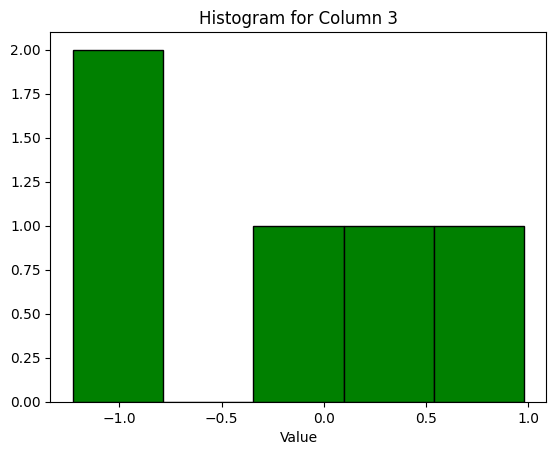

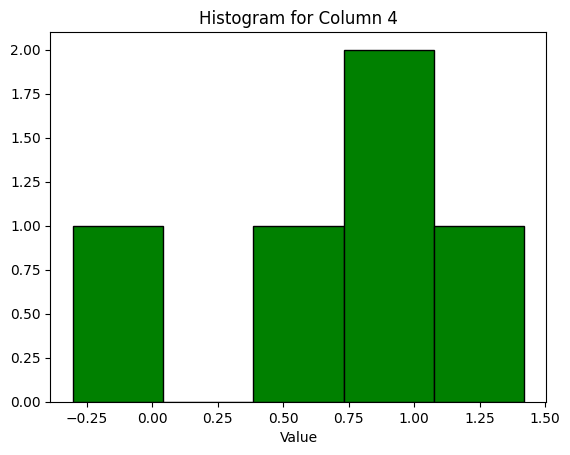

Математическое ожидание для строк:
[-0.14541137  0.19961244  0.15783918 -0.23135875  0.35148007]
Математическое ожидание для столбцов:
[-0.05153663 -0.15492844 -0.24489999  0.71709433]
Дисперсия для строк:
[1.47716155 0.92124036 1.8623391  0.59998201 0.32397254]
Дисперсия для столбцов:
[0.97016976 1.66577786 0.79217009 0.32915395]


In [124]:
def explore_matrix(m, n):
    matrix = np.random.normal(size=(m, n))

    row_means = np.mean(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    row_variances = np.var(matrix, axis=1)
    col_variances = np.var(matrix, axis=0)

    print("Matrix: ")
    print(matrix)

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i], bins=n, color='blue', edgecolor='black')
        plt.title(f"Histogram for Row {i + 1}")
        plt.xlabel("Value")
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=m, color='green', edgecolor='black')
        plt.title(f"Histogram for Column {j + 1}")
        plt.xlabel("Value")
        plt.show()

    return row_means, col_means, row_variances, col_variances


row_m, col_m, row_v, col_v = explore_matrix(5, 4)

print("Математическое ожидание для строк:")
print(row_m)
print("Математическое ожидание для столбцов:")
print(col_m)
print("Дисперсия для строк:")
print(row_v)
print("Дисперсия для столбцов:")
print(col_v)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [125]:
def chess(m, n, a, b):
    chess_board = np.full((m, n), b)

    for i in range(2):
        chess_board[i::2, i::2] = a

    return chess_board


def test(m, n, a, b, expected):
    res = chess(m, n, a, b)
    assert np.array_equal(res, expected)


test(2, 2, 1, 2, np.array([[1, 2], [2, 1]]))
test(3, 3, 3, 4, np.array([[3, 4, 3], [4, 3, 4], [3, 4, 3]]))
test(4, 4, 5, 6, np.array([[5, 6, 5, 6], [6, 5, 6, 5], [5, 6, 5, 6], [6, 5, 6, 5]]))

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

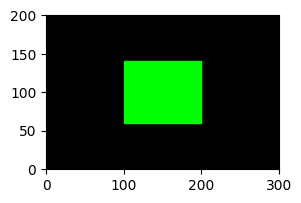

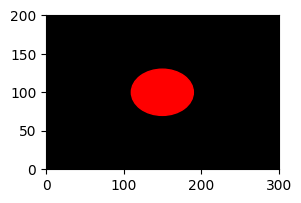

In [126]:
from matplotlib import patches


def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig, ax = plt.subplots(figsize=(m / 100, n / 100))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.add_patch(patches.Rectangle(((m - a) / 2, (n - b) / 2), a, b, color=rectangle_color))
    ax.set_facecolor(background_color)


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig, ax = plt.subplots(figsize=(m / 100, n / 100))
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ax.add_patch(patches.Ellipse((m / 2, n / 2), a, b, color=ellipse_color))
    ax.set_facecolor(background_color)
    plt.show()


draw_rectangle(100, 80, 300, 200, (0, 1, 0), (0, 0, 0))
draw_ellipse(80, 60, 300, 200, (1, 0, 0), (0, 0, 0))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [127]:
def analyze_time_series(time_series, p):
    mean = np.mean(time_series)

    variance = np.var(time_series)

    std_deviation = np.sqrt(variance)

    local_maxima = np.where((time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:]))[0] + 1
    local_minima = np.where((time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:]))[0] + 1

    moving_average = np.convolve(time_series, np.ones(p) / p, mode='valid')

    return mean, variance, std_deviation, local_maxima, local_minima, moving_average


time_series_example = np.array([1, 7, 4, 5, 9, 8, 3, 2, 7, 2, 3, 1])
p_example = 3
mean_res, variance_res, std_deviation_res, local_maxima_res, local_minima_res, moving_average_res = analyze_time_series(
    time_series_example, p_example)

print("Математическое ожидание:")
print(mean_res)
print("Дисперсия:")
print(variance_res)
print("СКО:")
print(std_deviation_res)
print("Локальные максимумы:")
print(local_maxima_res)
print("Локальные минимумы:")
print(local_minima_res)
print("Ряд, получаемый методом скользящего среднего:")
print(moving_average_res)

Математическое ожидание:
4.333333333333333
Дисперсия:
7.222222222222222
СКО:
2.6874192494328497
Локальные максимумы:
[ 1  4  8 10]
Локальные минимумы:
[2 7 9]
Ряд, получаемый методом скользящего среднего:
[4.         5.33333333 6.         7.33333333 6.66666667 4.33333333
 4.         3.66666667 4.         2.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [128]:
def one_hot_encoding(vector):
    num_classes = np.max(vector) + 1
    one_hot_matrix = np.zeros((len(vector), num_classes))
    one_hot_matrix[np.arange(len(vector)), vector] = 1
    return one_hot_matrix


vector_example = np.array([1, 3, 4, 5, 6, 2])
one_hot_matrix_example = one_hot_encoding(vector_example)

print(one_hot_matrix_example)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]
